In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt

In [2]:
alcohol_data = pd.read_csv('drinks.csv')

In [3]:
alcohol_data.shape

(193, 5)

In [4]:
alcohol_data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [5]:
alcohol_data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [6]:
alcohol_data.isna().sum() #NO NULL VALUES

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [7]:
alcohol_data.to_csv('alcohol_data', index = False)

In [8]:
wine_consumption_top_10 = alcohol_data.groupby('country')['wine_servings'].sum().nlargest(10)
top_wine_data = pd.DataFrame(wine_consumption_top_10)
top_wine_data.reset_index(inplace=True)
top_wine_data

,country,wine_servings
0,France,370
1,Portugal,339
2,Andorra,312
3,Switzerland,280
4,Denmark,278
5,Slovenia,276
6,Luxembourg,271
7,Croatia,254
8,Italy,237
9,Equatorial Guinea,233


#### CONCLUSION

USA is very low on the list for wine consumption given the fact that they produce a great deal of wine (from the findings in our review data)

Very surprising that Spain does not make it to the top 10 countries for wine consumption

In [9]:
alcohol_data[alcohol_data['country'] == 'USA']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
184,USA,249,158,84,8.7


In [10]:
alcohol_data[alcohol_data['country'] == 'Spain']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
160,Spain,284,157,112,10.0


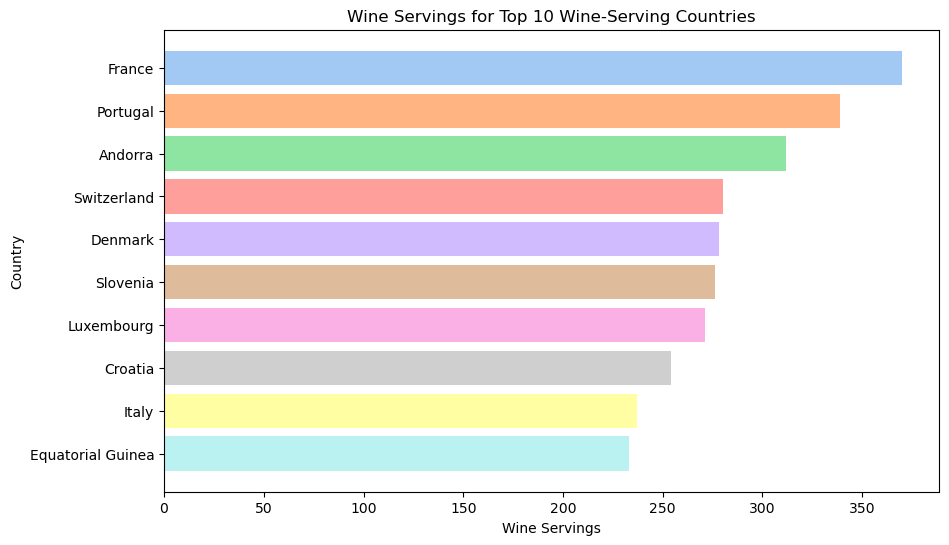

In [11]:
colors = sns.color_palette("pastel", len(top_wine_data))

plt.figure(figsize=(10, 6))
plt.barh(top_wine_data['country'], top_wine_data['wine_servings'], color= colors)
plt.xlabel('Wine Servings')
plt.ylabel('Country')
plt.title('Wine Servings for Top 10 Wine-Serving Countries')
plt.gca().invert_yaxis() 
plt.show()

In [12]:
beer_consumption_top_10 = alcohol_data.groupby('country')['beer_servings'].sum().nlargest(10)
top_beer_data = pd.DataFrame(beer_consumption_top_10)
top_beer_data.reset_index(inplace=True)

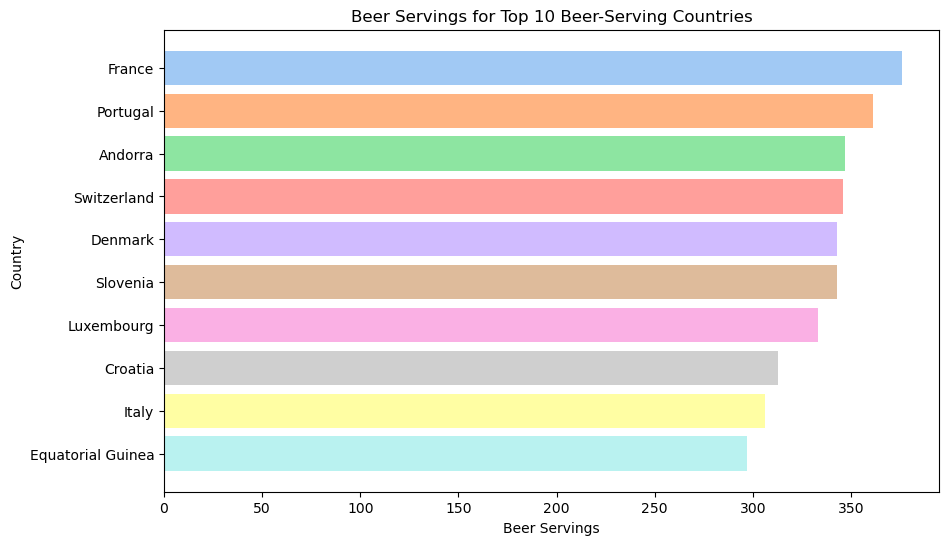

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(top_wine_data['country'], top_beer_data['beer_servings'], color= colors)
plt.xlabel('Beer Servings')
plt.ylabel('Country')
plt.title('Beer Servings for Top 10 Beer-Serving Countries')
plt.gca().invert_yaxis() 
plt.show()

In [14]:
spirit_consumption_top_10 = alcohol_data.groupby('country')['spirit_servings'].sum().nlargest(10)
top_spirit_data = pd.DataFrame(spirit_consumption_top_10)
top_spirit_data.reset_index(inplace=True)

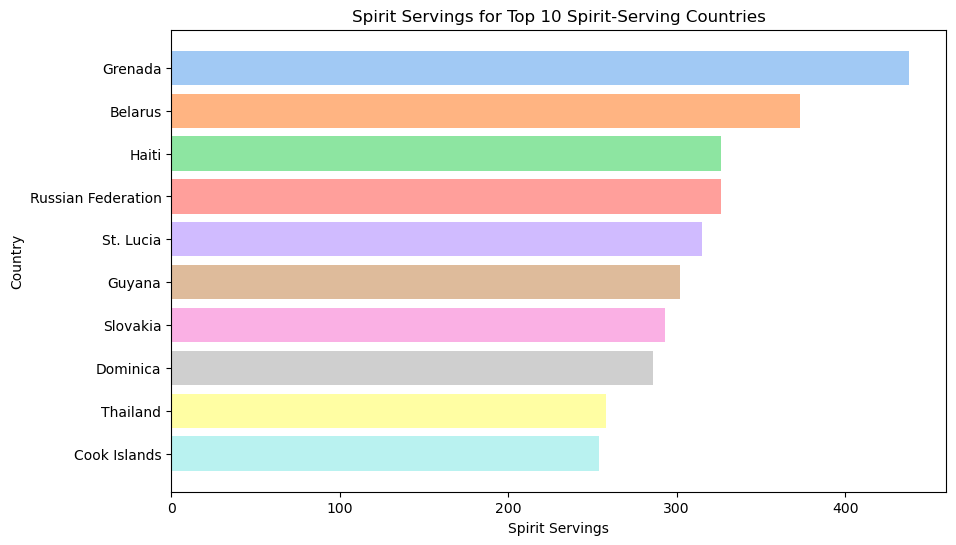

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(top_spirit_data['country'], top_spirit_data['spirit_servings'], color= colors)
plt.xlabel('Spirit Servings')
plt.ylabel('Country')
plt.title('Spirit Servings for Top 10 Spirit-Serving Countries')
plt.gca().invert_yaxis() 
plt.show()